<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_1_8_exercice_pr%C3%A9diction_immo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données


In [1]:
import pandas as pd
housing=pd.read_csv("https://dataks.bitbucket.io/ml/houses.csv")

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     546 non-null    int64 
 1   lotsize   546 non-null    int64 
 2   bedrooms  546 non-null    int64 
 3   bathrms   546 non-null    int64 
 4   stories   546 non-null    int64 
 5   driveway  546 non-null    object
 6   recroom   546 non-null    object
 7   fullbase  546 non-null    object
 8   gashw     546 non-null    object
 9   airco     546 non-null    object
 10  garagepl  546 non-null    int64 
 11  prefarea  546 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.3+ KB


In [3]:
housing.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,420000,585,3,1,2,yes,no,yes,no,no,1,no
1,385000,400,2,1,1,yes,no,no,no,no,0,no
2,495000,306,3,1,1,yes,no,no,no,no,0,no
3,605000,665,3,1,2,yes,yes,no,no,no,0,no
4,610000,636,2,1,1,yes,no,no,no,no,0,no


# Régression linéaire multiple

## Base d'apprentissage et de test

In [4]:
from sklearn.model_selection import train_test_split

X = housing[['lotsize','bedrooms','stories','bathrms','bathrms','driveway','recroom',
        'fullbase','gashw','airco','garagepl','prefarea']]

y = housing[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Preprocessing

**Question** Transformer les variables catégoriques en utilisant un pipeline.

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_features = ['driveway','recroom',
        'fullbase','gashw','airco','prefarea']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

## Création de régression linéaire

**Question** Créer un pipeline pour inclure l'étape de preprocesing (en utilisant `ColumnTransformer`) et la création d'un modèle de régression linéaire.

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)])


clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('linearModl', lmodellineaire)])


clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.211


## Evaluation

**Question** Evaluer le modèle en utilisant plusieurs métriques.

In [9]:
import numpy as np

E = clf.predict(X_train) - y_train
S = E**2
M = S.mean()
R = np.sqrt(M)
R

price    201769.931543
dtype: float64

# Transformation variable cible

**Question** on peut transformer la variable cible avec en calculant son logarithme.

In [13]:
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats
import numpy as np

housing['log_price'] = np.log(housing['price'])
(mu, sigma) = norm.fit(housing['log_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 13.36 and sigma = 0.37



**Question** Calculer les métriques du nouveau modèle (en passant par le log de la variable cible) et les comparer avec celles obtenues sans cette transformation log.

In [15]:
print("Skewness: %f" % housing['log_price'].skew())
print("Kurtosis: %f" % housing['log_price'].kurt())

Skewness: 0.137613
Kurtosis: -0.137420


In [17]:
(mu, sigma) = norm.fit(housing['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 681215.97 and sigma = 266782.07



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


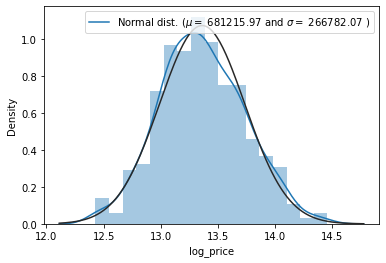

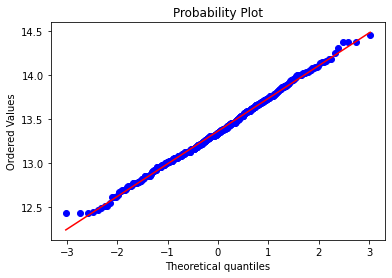

In [19]:
# On visualise l 'histogramme
import seaborn as sns
sns.distplot(housing['log_price'], fit=norm);

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

fig = plt.figure()
res = stats.probplot(housing['log_price'],plot=plt)
plt.show()